# Crowdfunding: Predicting Kickstarter Project Success

In [1]:
#Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
print("Modules imported successfully!")

Modules imported successfully!


In [2]:
#Load the dataset and check its shape
df = pd.read_csv('kickstarter_Cpgn.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [3]:
#Check no. of Rows and Columns
print("No. of Rows:", df.shape[0])
print("No. of Columns:", df.shape[1])
print("Shape: ",df.shape)

No. of Rows: 378661
No. of Columns: 15
Shape:  (378661, 15)


In [4]:
#First 5 rows
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
#Last 5 rows
df.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [6]:
#Checking the data type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [7]:
#Stastical Info about Data
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [8]:
#No. of unique values in each feature
df.apply(lambda x: len(x.unique()))

ID                  378661
name                375765
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95456
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

In [9]:
#No. of null values in each feature
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [10]:
# % of missing values in each feature
percent_missing = (df.isnull().sum()*100/(len(df))).round(2)
percent_missing_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
percent_missing_df.sort_values('percent_missing', ascending=False)

,column_name,percent_missing
usd pledged,usd pledged,1.0
ID,ID,0.0
name,name,0.0
category,category,0.0
main_category,main_category,0.0
currency,currency,0.0
deadline,deadline,0.0
goal,goal,0.0
launched,launched,0.0
pledged,pledged,0.0


In [11]:
#Check for duplicate rows
df.duplicated().sum()

0

In [12]:
#Converting dtype of deadline and launch date to datetime
df['deadline'] = df['deadline'].apply(pd.to_datetime)
df['launched'] = df['launched'].apply(pd.to_datetime)

#Creating a new feature - duration - for the duration of project
df['duration'] = df['deadline']-df['launched']
df['duration'] = df['duration'].dt.days

In [13]:
#Mapping countries and replacing 'N,0"' according to currency
country = {'USD':'US', 'AUD':'AU', 'CAD':'CA', 'GBP':'GB', 'EUR':'DE', 'SEK':'SE', 'DKK':'DK', 'NZD':'NZ', 'NOK':'NO', 'CHF':'CH'}
invalid = df[df['country'] == 'N,0"']
invalid['country'] = invalid['currency'].map(country)

#Placing it in original data
invalid_country = invalid['country'].iloc[:].values
j=0
for i in invalid.index:
    df['country'].iloc[i] =invalid_country[j]
    j=j+1

In [14]:
#Because the ID column has unique values, we can set it as index
df = df.set_index('ID')

In [15]:
#Merging canceled and suspended state
df['state'].replace(to_replace='suspended', value='canceled', inplace=True)

In [16]:
#Checking the dataset before starting with EDA
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55


# Exploratory Data Analysis

Text(0.5, 1.0, 'No. of Projects by their state')

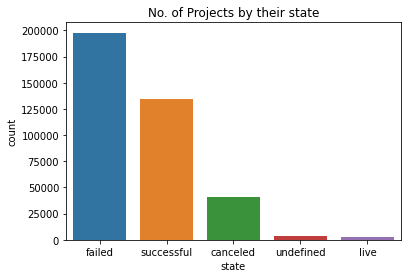

In [17]:
#State graph
sns.countplot(df['state'], order=df.state.value_counts().index)
plt.title('No. of Projects by their state')

- Only **one-third(>33%)** of the projects accomplish their goals.
- More than **50%** of kickstarter projects gets failed.
- Nearly **10%** project gets canceled.

In [18]:
#Creating a feature with position of only successful and failed projects
df['state_two'] = df['state'].loc[df['state'].isin(['successful','failed'])]

Text(0.5, 1.0, 'No. of Projects by Category')

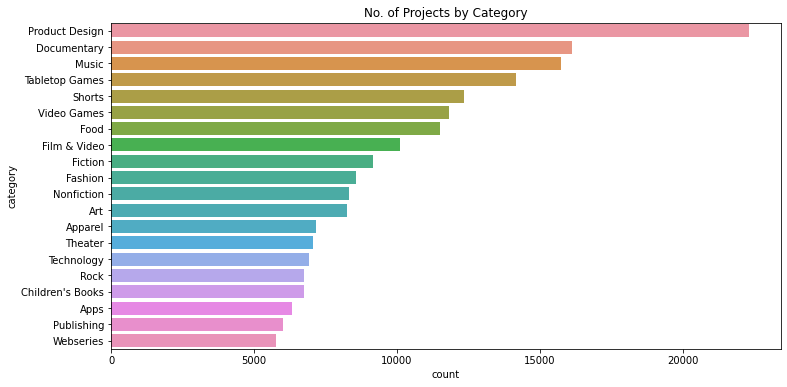

In [19]:
#Plotting the category column
plt.figure(figsize=(12,6))
sns.countplot(y=df['category'], data=df, order=df.category.value_counts().iloc[:20].index)
plt.title('No. of Projects by Category')

- There are total 159 categories in categories feature.
- This are top 20 categories by kickstart projects.
- **Product Design** is the most popular category in terms of raising fund.

Text(0.5, 1.0, 'Successful and Failed Projects by Category')

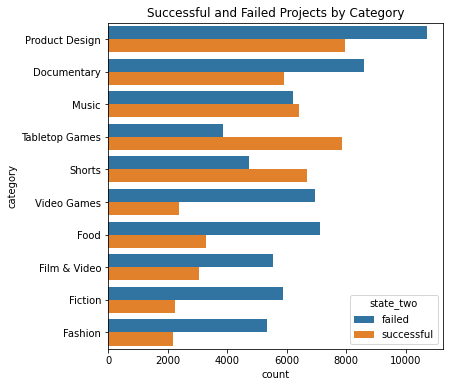

In [20]:
#Plotting the category column with state with top 10 categories
plt.figure(figsize=(6,6))
sns.countplot(y=df['category'], data=df, hue=df['state_two'], order=df.category.value_counts().iloc[:10].index)
plt.title('Successful and Failed Projects by Category')

- Most of the categories have more failure rate in comparison to success.
- **Music**, **Tabeletop Games** and **Shorts** have better success rate in themselves than other categories in category.

Text(0.5, 1.0, 'No. of Projects by Main Category')

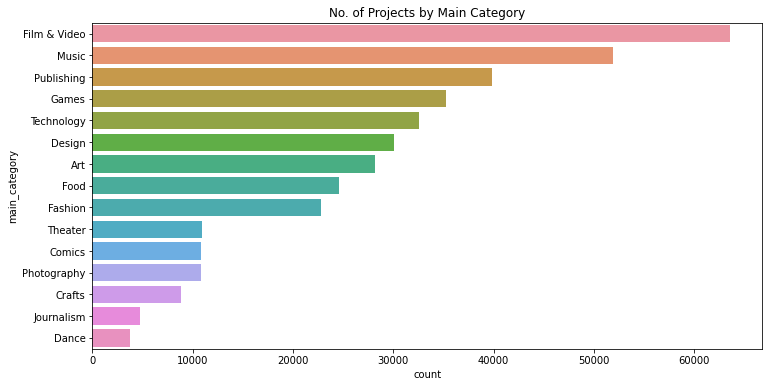

In [21]:
#Plotting the main category column
plt.figure(figsize=(12,6))
sns.countplot(y=df['main_category'], data=df, order=df.main_category.value_counts().index)
plt.title('No. of Projects by Main Category')

- There are total 15 categories in main category feature.
- **Film & Video** is the most popular category in main category. **(16.79%)**

Text(0.5, 1.0, 'Successful & Failed Projects by Main Category')

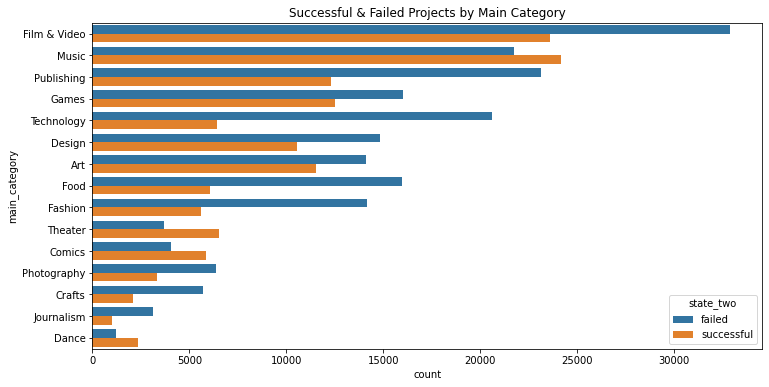

In [22]:
#Plotting the main category column by state
plt.figure(figsize=(12,6))
sns.countplot(y=df['main_category'], data=df, hue=df['state_two'], order=df.main_category.value_counts().index)
plt.title('Successful & Failed Projects by Main Category')

- Most of the categories have more failure rate in comparison to success.
- **Music**, **Theater**, **Comics** and **Dance** have better success rate in themselves than other category in main categories.

Text(0.5, 1.0, 'No. of Projects by Currency')

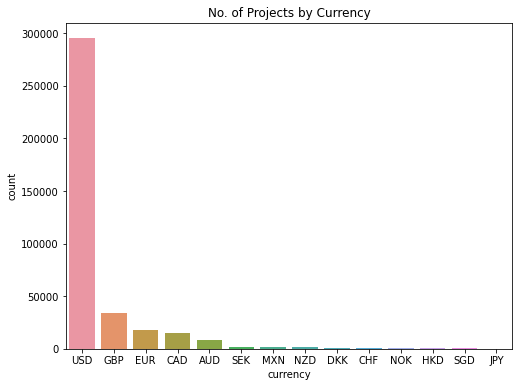

In [23]:
#Plotting the currency column
plt.figure(figsize=(8,6))
sns.countplot(df['currency'], order=df.currency.value_counts().index)
plt.title('No. of Projects by Currency')

- **USD**, i.e., US Dollar, is the most popular currency for raising funds.**(78%)**
- After USD, **GBP** and **EUR** are the most prevailing currency.(Nearly 9% and 4% respectively)

Text(0.5, 1.0, 'No. of Projects by Country')

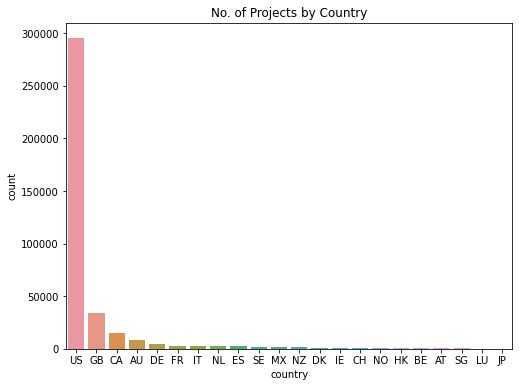

In [24]:
#Plotting the country feature
plt.figure(figsize=(8,6))
sns.countplot(df['country'],order=df['country'].value_counts().index)
plt.title('No. of Projects by Country')

- Most of the projects are from **US (78%)**, followed by **GB (9.01%)** (Great Britain).

In [25]:
#Dictionary for converting duration in to distinct categories
duration_category = {
    range(0,15): '0-15',
    range(15,30): '15-30',
    range(30,45): '30-45',
    range(45,60): '45-60',
    range(60,16739): '60+'
}

Text(0.5, 1.0, 'Duration')

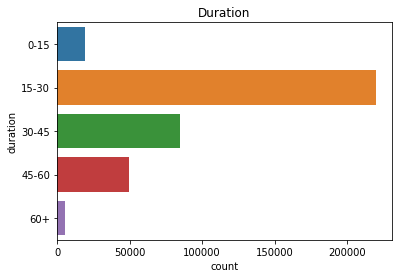

In [26]:
#Categorising using above dictionary
duration = df['duration'].apply(lambda x: next((v for k, v in duration_category.items() if x in k), 0))
duration = duration.sort_values()

#Plotting Duration
sns.countplot(y=duration)
plt.title('Duration')

- Most of the projects have duration of **15-30** days.**(58.04%)**
- Followed by **30-45** and **45-60** days, respectively.**(22.40%)** & **(13.11%)**

In [27]:
#Dictionary for converting backers in to distinct categories
backers_category = {
    range(0,1): '0',
    range(0,10): '1-10',
    range(10,100): '10-100',
    range(100,1000): '100-1000',
    range(1000,1000000): '1000+'
}

Text(0.5, 1.0, 'Backers')

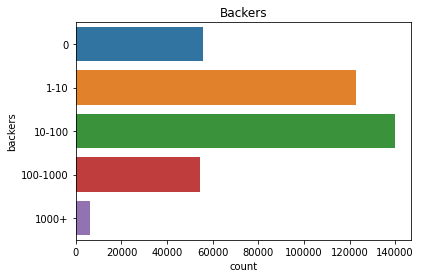

In [28]:
#Categorising backers using above dictionary
backers = df['backers'].apply(lambda x: next((v for k, v in backers_category.items() if x in k), 0))
backers = backers.sort_values()

#Plotting backers
sns.countplot(y=backers)
plt.title('Backers')

- Most of the projects have **10-100 (36.92%)** backers, followed by **1-10 (32.43%)** backers.
- Nearly **14.68%** have 0 backers.
- Highest No. of backers for a project is: **219382**

Text(0.5, 1.0, 'Successful & Failed Projects by Backers')

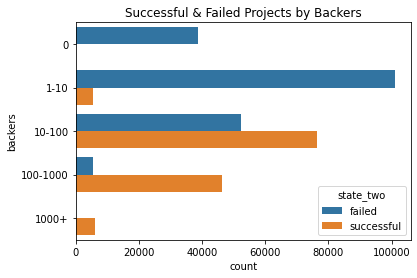

In [29]:
#Plotting backers with state
sns.countplot(y=backers, hue = df['state_two'])
plt.title('Successful & Failed Projects by Backers')

- Most of the projects having backers **less than 10**, are bound to fail.
- Success rate increases with no. of backers. (above chart proves this)

In [30]:
#Dictionary for converting usd pledged real in to distinct categories
usd_pledged_real_category = {
     range(0, 1): '0-1',
     range(1, 100): '1-100',
     range(100, 1000): '100-1000',
     range(1000, 10000): '1000-10000',
     range(10000,100000): '10000-100000',
     range(100000, 1000000): '100000-1000000',
     range(1000000, 100000000): '1000000+'}

Text(0.5, 1.0, 'Pledged Amount in USD')

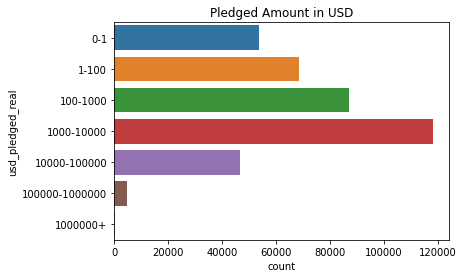

In [31]:
#Categorising using above dictionary
usd_pledged_real_int = df['usd_pledged_real'].astype(int)
usd_pledged_real = usd_pledged_real_int.apply(lambda x: next((v for k, v in usd_pledged_real_category.items() if x in k), 0))
usd_pledged_real = usd_pledged_real.sort_values()

#Plotting pledged in usd real
sns.countplot(y=usd_pledged_real)
plt.title('Pledged Amount in USD')

- Most of the projects have **1K-10K** as their pledged amount in USD.**(31.21%)**
- Very few projects have more than **100K** USD pledged.**(1.31%)**
- Some projects have less than **1USD** pledged.**(14.15%)**
- Highest Amount pleged for a project is: **20,338,986.27** USD

In [32]:
#Dictionary for converting usd goal real in to distinct categories.
goal_category = {range(0, 100): '0-100',
     range(100, 1000): '100-1000',
     range(1000, 10000): '1000-10000',
     range(10000,100000): '10000-100000',
     range(100000, 1000000): '100000-1000000',
     range(1000000, 1000000000): '1000000+'}

Text(0.5, 1.0, 'Goal in USD')

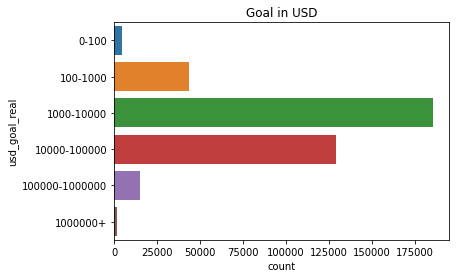

In [33]:
#Categorising using above dictionary
goal_int = df['usd_goal_real'].astype(int)
goal = goal_int.apply(lambda x: next((v for k, v in goal_category.items() if x in k), 0))
goal = goal.sort_values()

#Plotting goal in usd
sns.countplot(y=goal)
plt.title('Goal in USD')

- Most of the project are trying to raise **1K-10K (49.01%)** and **10k-100K (34.08%)**.
- Very few projects are trying to raise more than **100K**USD.**(4.27%)**
- Some projects are trying to raise less than **100**USD.**(1.16%)**
- Highes amount tried to be raised is: **166,361,390.71** USD

# PreProcessing

In [34]:
#Using rows with Either Successful or Failed States
df.dropna(inplace=True)
df['state'].unique()

array(['failed', 'successful'], dtype=object)

In [35]:
#Letter count in name feature
df['name_letter'] = df['name'].str.len()

#Word count in name feature
df['name_word'] = df['name'].apply(lambda x: len(str(x).split(' ')))

#Question mark in feature
df['name_question'] = (df['name'].str[-1]=='?').astype(int)

#Uppercase or not
df['name_upper'] = df['name'].str.isupper().astype(float)

In [36]:
#Creating new features using launched column
df['launched_year'] = df['launched'].dt.year
df['launched_quarter'] = df['launched'].dt.quarter
df['launched_month'] = df['launched'].dt.month
df['launched_week'] = df['launched'].dt.week
df['launched_date'] = df['launched'].dt.day
df['launched_day'] = df['launched'].dt.dayofweek

In [37]:
#Finding the competition for a project in their category by year
competition_year = df.groupby(['category', 'launched_year']).count()
competition_year = competition_year[['name']]
competition_year.reset_index(inplace=True)

#Finding the competition for a project in their category by quarter
competition_quarter = df.groupby(['category', 'launched_year', 'launched_quarter']).count()
competition_quarter = competition_quarter[['name']]
competition_quarter.reset_index(inplace=True)

#Finding the competition for a project in their category by month
competition_month = df.groupby(['category', 'launched_year', 'launched_month']).count()
competition_month = competition_month[['name']]
competition_month.reset_index(inplace=True)

In [38]:
#Renaming the columns 
year=['category', 'launched_year','competition_year']
competition_year.columns=year

quarter=['category', 'launched_year', 'launched_quarter','competition_quarter']
competition_quarter.columns=quarter

month=['category', 'launched_year', 'launched_month','competition_month']
competition_month.columns=month

In [39]:
#Merging the df to original data
df = pd.merge(df, competition_year, on = ['category', 'launched_year'], how = 'left')
df = pd.merge(df, competition_quarter, on = ['category', 'launched_year', 'launched_quarter'], how = 'left')
df = pd.merge(df, competition_month, on =['category', 'launched_year', 'launched_month'], how = 'left')

In [40]:
#Dropping unnecessary columns
df.drop(columns=['name', 'deadline', 'launched','state_two', 'country'], inplace=True)

In [41]:
#Dropping columns that won't be available at the start of project
df.drop(columns=['pledged', 'usd pledged', 'usd_pledged_real'], inplace=True)

In [42]:
#Because USD dominates the dataset we will convert into a 1 if USD or 0 if not.
df['currency'] = df['currency'] == 'USD'

In [43]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])
df['main_category'] = le.fit_transform(df['main_category'])
df.head()

,category,main_category,currency,goal,state,backers,usd_goal_real,duration,name_letter,name_word,...,name_upper,launched_year,launched_quarter,launched_month,launched_week,launched_date,launched_day,competition_year,competition_quarter,competition_month
0,108,12,False,1000.0,failed,0,1533.95,58,31,6,...,0.0,2015,3,8,33,11,1,228,59,11
1,93,6,True,30000.0,failed,15,30000.00,59,45,8,...,0.0,2017,3,9,35,2,5,177,45,14
2,93,6,True,45000.0,failed,3,45000.00,44,14,3,...,0.0,2013,1,1,2,12,5,1000,230,74
3,90,10,True,5000.0,failed,1,5000.00,29,49,7,...,0.0,2012,1,3,11,17,5,2443,653,235
4,123,7,True,50000.0,successful,224,50000.00,34,20,3,...,0.0,2016,1,2,8,26,4,551,189,66


In [44]:
X = df.drop(columns='state')
y = df['state']

In [45]:
#Splitting the data into Training and Test Set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=0)

In [46]:
#Converting df to array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [47]:
#Changing state array to bool
y_train = y_train == 'successful'
y_test = y_test == 'successful'

# Training the model

## 1. Logistic Regression

In [48]:
# Importing LR module and classification metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

In [49]:
#Initialising LR model and fitting with training dataset
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

In [50]:
#Checking the prediction for our 1st element of test dataset
logisticRegr.predict(X_test[0].reshape(1,-1))

array([False])

In [51]:
#Checking the predictions for top 10 rows of test dataset
logisticRegr.predict(X_test[0:10])

array([False, False,  True, False, False, False, False, False,  True,
       False])

In [52]:
#Predicting on test dataset with our model
predictions = logisticRegr.predict(X_test)

In [53]:
#Score of our model on test data
score = logisticRegr.score(X_test, y_test)
print(score)

0.8988384809744692


In [54]:
#F1 Score
print(f1_score(y_test,predictions))

0.8664891499104121


In [55]:
#Confusion Matrix
cnf = confusion_matrix(y_test,predictions)
print(cnf)

[[60519  2736]
 [ 7994 34819]]


In [56]:
#Precison and Recall
print(precision_score(y_test,predictions))
print(recall_score(y_test,predictions))

0.9271468512847824
0.8132810127764931


Confusion Matrix on Test Data Plot


<AxesSubplot:>

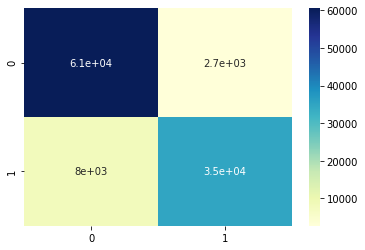

In [57]:
#Visualising Confusion matrix
print("Confusion Matrix on Test Data Plot")
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='YlGnBu')

In [58]:
#Summary of metrics on Logistic Regression model
print("Score: ",logisticRegr.score(X_test, y_test))
print("F1_Score: ",f1_score(y_test, predictions))
print("Precision: ",precision_score(y_test, predictions))
print("Recall: ",recall_score(y_test, predictions))

Score:  0.8988384809744692
F1_Score:  0.8664891499104121
Precision:  0.9271468512847824
Recall:  0.8132810127764931


## 2. Random Forest

In [59]:
#Importing module required for random forest
from sklearn.ensemble import RandomForestClassifier

In [60]:
#Creating a function to help us build the most optimum Random Forest model
def best_tree(x_train, y_train, x_test, y_test):
    tree_score = {}
    for tree in range(1,21):
        model = RandomForestClassifier(n_jobs=3,n_estimators=tree,criterion = 'entropy')
        model.fit(x_train,y_train)
        tree_score[tree] = round(model.score(x_test, y_test)*100,2)
        print(tree, tree_score[tree])
    maximum_score = max(tree_score.values())    
    for key in tree_score.keys():
        if tree_score[key] == maximum_score:
            best_key = key
            print(f"the optimum number of trees is: {key} with the score of {maximum_score}")
            break
    model = RandomForestClassifier(n_jobs=3,n_estimators=best_key,criterion = 'entropy')
    model.fit(x_train,y_train)
    print(f"Accuracy: {round(model.score(x_test, y_test)*100,2)}%")
    return model

In [61]:
#Calling the previous function with our datasets
models_best_params = best_tree(X_train, y_train, X_test, y_test)

1 88.57
2 86.77
3 91.16
4 90.95
5 91.99
6 91.89
7 92.33
8 92.3
9 92.5
10 92.5
11 92.53
12 92.66
13 92.78
14 92.64
15 92.78
16 92.81
17 92.74
18 92.91
19 92.88
20 92.88
the optimum number of trees is: 18 with the score of 92.91
Accuracy: 92.86%


In [62]:
#Building the model on training dataset
model = RandomForestClassifier(n_jobs=3,n_estimators=19 ,criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=19, n_jobs=3)

In [63]:
#predictions and accuracy score
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9285835501753592


In [64]:
#F! Score
f1_score(y_test, y_pred)

0.9125157356185108

In [65]:
#Confusion Matrix
cnf = confusion_matrix(y_test,predictions)
print(cnf)

[[60519  2736]
 [ 7994 34819]]


Confusion Matrix on Test Data Plot


<AxesSubplot:>

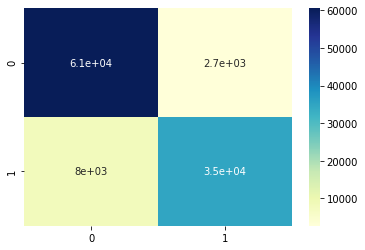

In [66]:
#Visualising Confusion matrix
print("Confusion Matrix on Test Data Plot")
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='YlGnBu')

In [67]:
#Lisitng features and their importance
fn = [x for x in df.columns if x != "state"]
feature_imp = pd.Series(model.feature_importances_, index= fn).sort_values(ascending=False)
feature_imp

backers                0.579034
usd_goal_real          0.093364
goal                   0.067407
name_letter            0.024392
duration               0.023123
competition_month      0.022319
competition_quarter    0.022027
competition_year       0.021995
category               0.021888
launched_date          0.021368
launched_week          0.019572
main_category          0.017738
name_word              0.016828
launched_year          0.014325
launched_day           0.013192
launched_month         0.011837
launched_quarter       0.005122
currency               0.003037
name_upper             0.001193
name_question          0.000241
dtype: float64

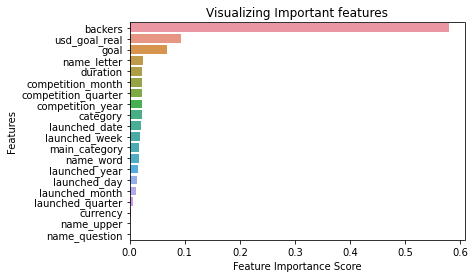

In [68]:
#Visualising Feature Importance
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

In [69]:
#Summary of metrics on Random Forest model
print("Score: ",model.score(X_test, y_test))
print("F1_Score: ",f1_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))

Score:  0.9285835501753592
F1_Score:  0.9125157356185108
Precision:  0.9024992004386165
Recall:  0.9227571064863476


## 3. Light Gradient Boosting Machine (LGBM)

In [70]:
#Importing Required Modules
import lightgbm as lgb
from sklearn.metrics import classification_report

In [71]:
#Initialising the lightgbm model and training with train data
gbm = lgb.LGBMClassifier()
gbm = gbm.fit(X_train, y_train)

In [72]:
#Predicitons 
y_pred_lgbm = gbm.predict(X_test)

In [73]:
#Score
gbm.score(X_test, y_test)

0.9345891315005468

In [74]:
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_lgbm)))

LightGBM Model accuracy score: 0.9346


In [75]:
#Comparing train and test set accuracy
y_pred_train=gbm.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9372


In [76]:
#Print the scores on training and test set

print('Training set score: {:.4f}'.format(gbm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gbm.score(X_test, y_test)))

Training set score: 0.9372
Test set score: 0.9346


In [77]:
#Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_test, y_pred_lgbm)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[59374  3881]
 [ 3057 39756]]

True Positives(TP) =  59374

True Negatives(TN) =  39756

False Positives(FP) =  3881

False Negatives(FN) =  3057


<AxesSubplot:>

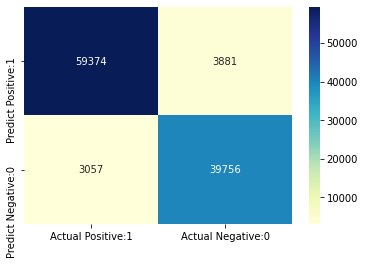

In [78]:
#Visualize confusion matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [79]:
#Classification Report
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

       False       0.95      0.94      0.94     63255
        True       0.91      0.93      0.92     42813

    accuracy                           0.93    106068
   macro avg       0.93      0.93      0.93    106068
weighted avg       0.93      0.93      0.93    106068



In [80]:
#Summary of metrics on LGBM
print("Score: ",gbm.score(X_test, y_test))
print("F1_Score: ",f1_score(y_test, y_pred_lgbm))
print("Precision: ",precision_score(y_test, y_pred_lgbm))
print("Recall: ",recall_score(y_test, y_pred_lgbm))

Score:  0.9345891315005468
F1_Score:  0.9197455176402545
Precision:  0.9110617136833421
Recall:  0.9285964543479784


In [81]:
#Renaming the models
model_1 = logisticRegr
model_2 = model
model_3 = gbm

In [82]:
#List for model and their metrics
metrics_table = [['Logistic Regression', model_1.score(X_test, y_test), f1_score(y_test, predictions), precision_score(y_test, predictions), recall_score(y_test, predictions)],
                 ['Random Forest', model_2.score(X_test, y_test), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)],
                 ['LGBM', model_3.score(X_test, y_test), f1_score(y_test, y_pred_lgbm), precision_score(y_test, y_pred_lgbm), recall_score(y_test, y_pred_lgbm)]]
 
#Creating the DataFrame
metrics = pd.DataFrame(metrics_table, columns = ['Model', 'Score', 'F1 Score', 'Precision', 'Recall'])
metrics

,Model,Score,F1 Score,Precision,Recall
0,Logistic Regression,0.898838,0.866489,0.927147,0.813281
1,Random Forest,0.928584,0.912516,0.902499,0.922757
2,LGBM,0.934589,0.919746,0.911062,0.928596


In [83]:
import joblib

In [84]:
joblib.dump(model_2, 'final_rf.pkl')

['final_rf.pkl']

In [85]:
joblib.dump(model_3, 'final_lgbm.pkl')

['final_lgbm.pkl']